In [39]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
#Load Dataset
crm=pd.read_csv("C:\\Users\\MOHD SHOEB\\OneDrive\\Desktop\\Excelr Assignments\\Clustering\\crime_data.csv")
crm.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [41]:
crm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [42]:
crm.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


Murder         AxesSubplot(0.125,0.657941;0.227941x0.222059)
Assault     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
UrbanPop    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Rape           AxesSubplot(0.125,0.391471;0.227941x0.222059)
dtype: object

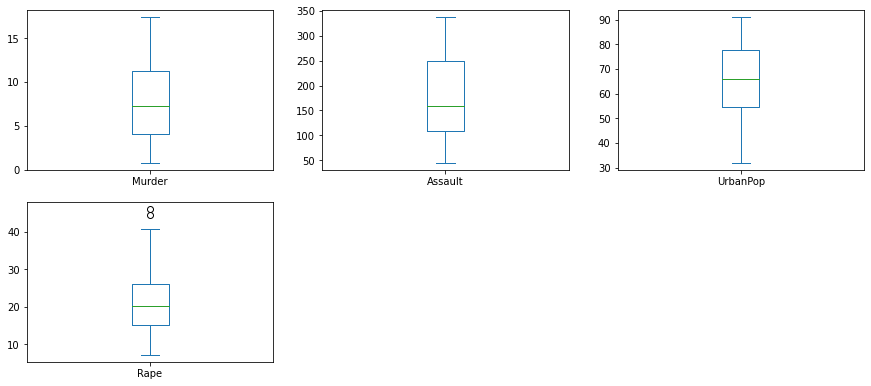

In [43]:
crm.plot(kind='box',subplots=True,layout=(3,3),figsize=(15,10)) 
#here we can see that each column boxplot shows the data is normally distributed except we have outliers in Rape column , we might check the records and can replace,remove or retain the records as per the domain knowledge

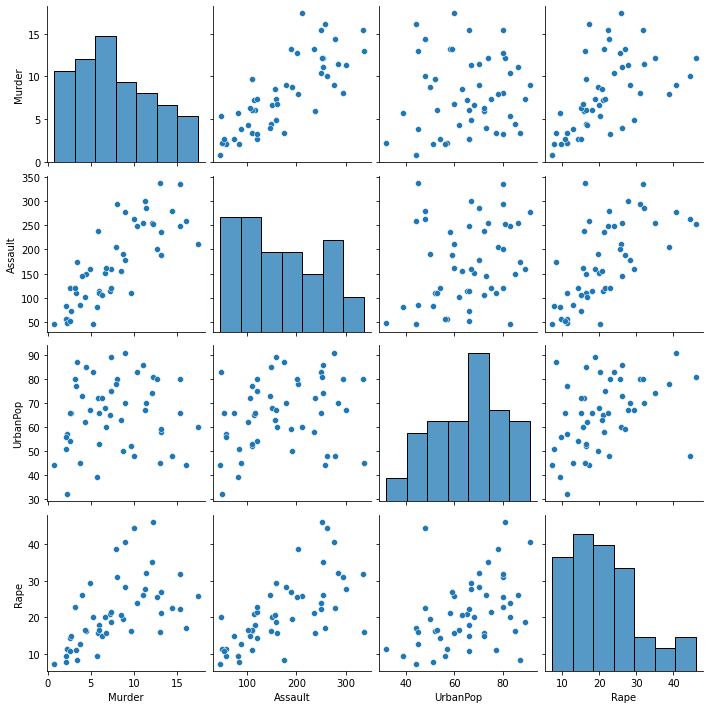

In [44]:
sns.pairplot(crm) #in this pairplot we can see scatterplot which shows relationship between 2 variables like linear ,-ve +ve correlation 

In [45]:
#from sklearn.preprocessing import LabelEncoder
#labelencoder=LabelEncoder()
#crm['City']=labelencoder.fit_transform(crm['City'])
#crm.

In [46]:
#Normalizing Dataset except City Column , as we want to form clusters based on similarities
from sklearn.preprocessing import normalize
crm_norm=normalize(crm.iloc[:,1:])
columns=['Murder','Assault','UrbanPop','Rape']
crm_norm=pd.DataFrame(crm_norm,columns=columns)
#crm_norm['City']=crm['City']
crm_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295


# Model creation using Hierarchical Clustering 

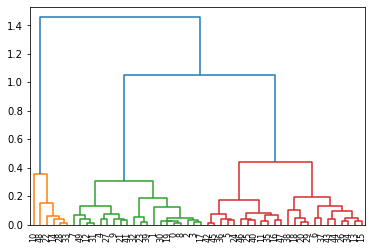

In [47]:
#Dendogram to find the hierarchical of clusters based on similarities and forming into 1 big cluster at the top 
dendrogram=sch.dendrogram(sch.linkage(crm_norm,method='ward'))

In [48]:
#based on Dendogram finalizing on 4 clusters and using Euclidean Distance and linkage ward
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')

In [49]:
y_hc=hc.fit_predict(crm_norm)
Clusters_hc=pd.DataFrame(y_hc,columns=['Clusters_hc'])
Clusters_hc.head()

,Clusters_hc
0,2
1,2
2,2
3,2
4,2


In [50]:
crm['Clusters_hc']=Clusters_hc
crm.head()

,City,Murder,Assault,UrbanPop,Rape,Clusters_hc
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,2


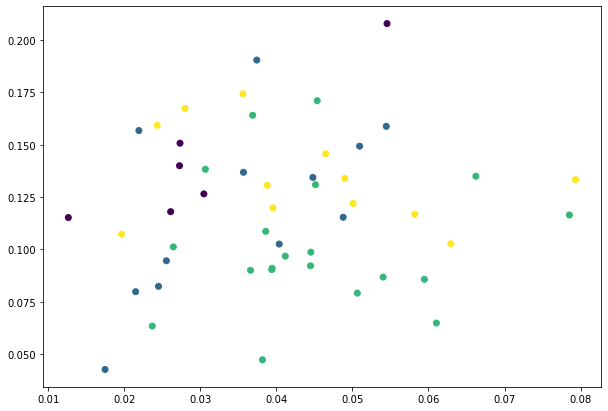

In [51]:
plt.figure(figsize=(10,7))
plt.scatter(crm_norm['Murder'],crm_norm['Rape'],c=hc.labels_)

In [52]:
crm_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295


In [53]:
y_hc_labels=np.unique(y_hc)
y_hc_labels

array([0, 1, 2, 3], dtype=int64)

In [54]:
#Silhoutte score to check the clusters are  correctly divided
from sklearn.metrics import silhouette_score
hc_score=silhouette_score(crm_norm,hc.labels_,metric='euclidean')
hc_score

0.44923935480079796

# K-means Clustering

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


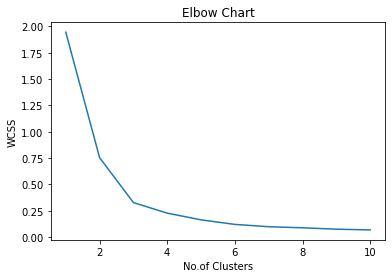

In [56]:
#Elbow Chart to find number of clusters best suited for the dataset at sharp elbow like bend
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(crm_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow Chart')
plt.xlabel("No.of Clusters")
plt.ylabel("WCSS")
plt.show()

In [57]:
kmeans1=KMeans(n_clusters=4,random_state=0)
kmeans1.fit(crm_norm)

KMeans(n_clusters=4, random_state=0)

In [58]:
kmeans1.labels_

array([1, 1, 1, 1, 1, 0, 3, 1, 1, 1, 2, 0, 1, 3, 2, 3, 0, 1, 3, 1, 3, 1,
       2, 1, 0, 0, 3, 1, 2, 3, 1, 1, 1, 2, 3, 0, 0, 3, 0, 1, 0, 1, 0, 3,
       3, 0, 0, 0, 2, 0])

In [59]:
crm_norm["Cluster_kmeans"]=kmeans1.labels_

In [60]:
crm_norm.head()

,Murder,Assault,UrbanPop,Rape,Cluster_kmeans
0,0.054031,0.966016,0.237411,0.086778,1
1,0.036872,0.969739,0.176987,0.164081,1
2,0.026439,0.959624,0.261122,0.101185,1
3,0.044528,0.961392,0.252998,0.098669,1
4,0.030657,0.940134,0.309972,0.138295,1


In [61]:
CL=crm_norm.groupby([  'Cluster_kmeans','Murder'])
CL.first()

Assault  UrbanPop      Rape
Cluster_kmeans Murder                                
0              0.017459  0.893478  0.446739  0.042620
               0.019640  0.906483  0.407917  0.107267
               0.024318  0.881521  0.443800  0.159282
               0.027987  0.908164  0.382685  0.167353
               0.035594  0.919142  0.351437  0.174367
               0.038785  0.877767  0.459297  0.130644
               0.039384  0.932482  0.347509  0.090352
               0.039535  0.904523  0.407335  0.119804
               0.046500  0.919676  0.361670  0.145701
               0.048998  0.890131  0.432816  0.133928
               0.050082  0.919147  0.371194  0.121964
               0.058203  0.921161  0.366631  0.116864
               0.062942  0.894442  0.430657  0.102695
               0.079346  0.891624  0.425362  0.133335
1              0.023674  0.954965  0.288897  0.063397
               0.026439  0.959624  0.261122  0.101185
               0.030657  0.940134  0.309972  0.138295
               0.036587  0.971339  0.216932  0.090011
               0.036872  0.969739  0.176987  0.164081
               0.038166  0.989371  0.132112  0.047267
               0.038586  0.964660  0.236934  0.108651
               0.039428  0.944007  0.314669  0.090989
               0.041163  0.941927  0.318920  0.096789
               0.044478  0.967547  0.231056  0.092134
               0.044528  0.961392  0.252998  0.098669
               0.045132  0.951126  0.276013  0.130920
               0.045363  0.937005  0.301180  0.171041
               0.050641  0.981163  0.168802  0.079126
               0.054031  0.966016  0.237411  0.086778
               0.059457  0.961347  0.254815  0.085710
               0.061041  0.981958  0.166819  0.064832
               0.066230  0.943274  0.296027  0.134968
               0.078534  0.952332  0.270805  0.116446
2              0.012626  0.710188  0.694406  0.115208
               0.026088  0.708107  0.695684  0.118018
               0.027251  0.693660  0.706047  0.139971
               0.027317  0.728452  0.667747  0.150749
               0.030455  0.620812  0.773086  0.126505
               0.054546  0.473419  0.854213  0.207893
3              0.021483  0.849097  0.521734  0.079795
               0.021908  0.821558  0.547706  0.156781
               0.024486  0.816202  0.571341  0.082362
               0.025527  0.864425  0.493128  0.094565
               0.035662  0.845935  0.514196  0.136842
               0.037410  0.816227  0.544152  0.190453
               0.040364  0.867284  0.485461  0.102547
               0.044795  0.858568  0.492743  0.134385
               0.048778  0.820702  0.557458  0.115363
               0.050940  0.837376  0.523360  0.149332
               0.054447  0.854521  0.491539  0.158805

In [62]:
crm['Cluster_kmeans']=kmeans1.labels_

In [63]:
crm.head()

,City,Murder,Assault,UrbanPop,Rape,Clusters_hc,Cluster_kmeans
0,Alabama,13.2,236,58,21.2,2,1
1,Alaska,10.0,263,48,44.5,2,1
2,Arizona,8.1,294,80,31.0,2,1
3,Arkansas,8.8,190,50,19.5,2,1
4,California,9.0,276,91,40.6,2,1


In [64]:
CL2=crm.groupby(['Cluster_kmeans','Murder'])
CL2.first()

City  Assault  UrbanPop  Rape  Clusters_hc
Cluster_kmeans Murder                                                      
0              2.6              Idaho      120        54  14.2            3
               3.4       Rhode Island      174        87   8.3            1
               3.8       South Dakota       86        45  12.8            3
               4.0         Washington      145        73  26.2            3
               4.9             Oregon      159        67  29.3            3
               5.7      West Virginia       81        39   9.3            3
               6.0            Montana      109        53  16.4            3
               6.6           Oklahoma      151        68  20.0            3
               6.8            Wyoming      161        60  15.6            2
               7.9           Colorado      204        78  38.7            3
               8.5           Virginia      156        63  20.7            3
               9.0           Missouri      178        70  28.2            3
               9.7           Kentucky      109        52  16.3            3
               12.7             Texas      201        80  25.5            3
1              5.9           Delaware      238        72  15.8            2
               8.1            Arizona      294        80  31.0            2
               8.8           Arkansas      190        50  19.5            2
               9.0         California      276        91  40.6            2
               10.0            Alaska      263        48  44.5            2
               10.4          Illinois      249        83  24.0            2
               11.1          New York      254        86  26.1            2
               11.3          Maryland      300        67  27.8            2
               11.4        New Mexico      285        70  32.1            2
               12.1          Michigan      255        74  35.1            2
               12.2            Nevada      252        81  46.0            2
               13.0    North Carolina      337        45  16.1            2
               13.2           Alabama      236        58  21.2            2
               14.4    South Carolina      279        48  22.5            2
               15.4           Florida      335        80  31.9            2
               16.1       Mississippi      259        44  17.1            2
               17.4           Georgia      211        60  25.8            2
2              0.8       North Dakota       45        44   7.3            0
               2.1      New Hampshire       57        56   9.5            0
               2.2               Iowa       56        57  11.3            0
               2.6          Wisconsin       53        66  10.8            0
               2.7          Minnesota       72        66  14.9            0
               5.3             Hawaii       46        83  20.2            0
3              2.1              Maine       83        51   7.8            1
               2.2            Vermont       48        32  11.2            1
               3.2               Utah      120        80  22.9            1
               3.3        Connecticut      110        77  11.1            1
               4.3           Nebraska      102        62  16.5            1
               4.4      Massachusetts      149        85  16.3            1
               6.0             Kansas      115        66  18.0            1
               6.3       Pennsylvania      106        72  14.9            1
               7.2            Indiana      113        65  21.0            1
               7.3               Ohio      120        75  21.4            1
               7.4         New Jersey      159        89  18.8            1

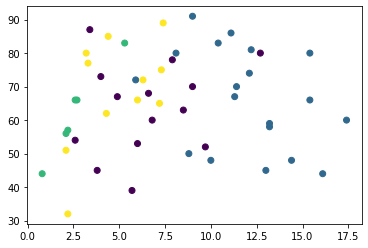

In [65]:
plt.scatter(crm['Murder'],crm['UrbanPop'],c=kmeans1.labels_) #scatterplot to see the how kmeans algorithm have labelled datapoints 

In [66]:
#Silhoutte score to check the clusters are  correctly divided
km_score=silhouette_score(crm_norm,kmeans1.labels_,metric='euclidean')
km_score

0.9180363213761794

# Using PCA transformation to get the majority of the data in two columns with a loss of some (0.05%) data to utilise for visualisation.


In [67]:
from sklearn.decomposition import PCA
pca=PCA(2)
pca_crm_norm=pca.fit_transform(crm_norm)
pca_crm_norm.shape

(50, 2)

# Hierarchical Clustering Vizualization of Clusters

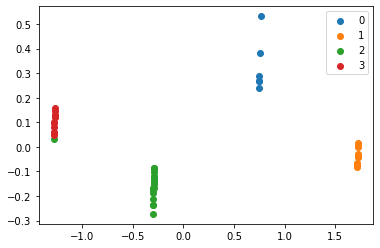

In [68]:
d=np.unique(y_hc)

for i in d:
    plt.scatter(pca_crm_norm[y_hc==i,0],pca_crm_norm[y_hc==i,1],label=i)
plt.legend()
plt.show()


In [69]:
crm.head()

,City,Murder,Assault,UrbanPop,Rape,Clusters_hc,Cluster_kmeans
0,Alabama,13.2,236,58,21.2,2,1
1,Alaska,10.0,263,48,44.5,2,1
2,Arizona,8.1,294,80,31.0,2,1
3,Arkansas,8.8,190,50,19.5,2,1
4,California,9.0,276,91,40.6,2,1


In [70]:
#Average of all the Crimes in Cluster=0 Cities
crm[crm['Clusters_hc']==0].mean()

C:\Users\MOHD SHOEB\AppData\Local\Temp\ipykernel_7572\1552152100.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crm[crm['Clusters_hc']==0].mean()


Murder             2.616667
Assault           54.833333
UrbanPop          62.000000
Rape              12.333333
Clusters_hc        0.000000
Cluster_kmeans     2.000000
dtype: float64

In [71]:
#Average of all the Crimes in Cluster=1 Cities
crm[crm['Clusters_hc']==1].mean()

C:\Users\MOHD SHOEB\AppData\Local\Temp\ipykernel_7572\3586034484.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crm[crm['Clusters_hc']==1].mean()


Murder              4.758333
Assault           116.583333
UrbanPop           70.083333
Rape               15.683333
Clusters_hc         1.000000
Cluster_kmeans      2.750000
dtype: float64

In [72]:
#Average of all the Crimes in Cluster=2 Cities
crm[crm['Clusters_hc']==2].mean()

C:\Users\MOHD SHOEB\AppData\Local\Temp\ipykernel_7572\2342499175.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crm[crm['Clusters_hc']==2].mean()


Murder             11.76
Assault           255.55
UrbanPop           66.10
Rape               27.09
Clusters_hc         2.00
Cluster_kmeans      0.95
dtype: float64

In [73]:
#Average of all the Crimes in Cluster=3 Cities
crm[crm['Clusters_hc']==3].mean()

C:\Users\MOHD SHOEB\AppData\Local\Temp\ipykernel_7572\3653377537.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crm[crm['Clusters_hc']==3].mean()


Murder              6.783333
Assault           141.583333
UrbanPop           61.833333
Rape               21.466667
Clusters_hc         3.000000
Cluster_kmeans      0.000000
dtype: float64

# Creating Tables for Hierarchical Clusters Based on Cities

In [74]:
from tabulate import tabulate
table=[['Hierarchical-Clusters','Crime','Murder','Assault','UrbanPop','Rape'],
       ['Cluster-0','Crime is Very Low','2.61','54.83',' 62.0','12.3']
       ,['Cluster-1','Crime is low','4.75','116.58','70.08', '15.68'],
       ['Cluster-2','Crime is Very High','11.76','255.55',' 66.10', '27.09'],
       ['Cluster-3','Crime is High','6.78','141.58','61.83','21.46']]

In [75]:
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════════════════╤════════════════════╤══════════╤═══════════╤════════════╤════════╕
│ Hierarchical-Clusters   │ Crime              │   Murder │   Assault │   UrbanPop │   Rape │
╞═════════════════════════╪════════════════════╪══════════╪═══════════╪════════════╪════════╡
│ Cluster-0               │ Crime is Very Low  │     2.61 │     54.83 │      62    │  12.3  │
├─────────────────────────┼────────────────────┼──────────┼───────────┼────────────┼────────┤
│ Cluster-1               │ Crime is low       │     4.75 │    116.58 │      70.08 │  15.68 │
├─────────────────────────┼────────────────────┼──────────┼───────────┼────────────┼────────┤
│ Cluster-2               │ Crime is Very High │    11.76 │    255.55 │      66.1  │  27.09 │
├─────────────────────────┼────────────────────┼──────────┼───────────┼────────────┼────────┤
│ Cluster-3               │ Crime is High      │     6.78 │    141.58 │      61.83 │  21.46 │
╘═════════════════════════╧════════════════════╧══════════╧═

Cities in Cluster-1 have more crime while Cities in Cluster -0 have very less crime infering cities in Cluster-0 are much safer than Cluster-2

In [76]:
crm[crm['Clusters_hc']==0].City

10           Hawaii
14             Iowa
22        Minnesota
28    New Hampshire
33     North Dakota
48        Wisconsin
Name: City, dtype: object

In [77]:
table_hc_0=[['Cities in Cluster-0'],['Hawaii'],['Iowa'],['Minnesota'],['New Hampshire'],
        ['North Dakota'],['Wisconsin']]

In [78]:
print(tabulate(table_hc_0,headers='firstrow',tablefmt='fancy_grid', showindex=range(1,7)))

╒════╤═══════════════════════╕
│    │ Cities in Cluster-0   │
╞════╪═══════════════════════╡
│  1 │ Hawaii                │
├────┼───────────────────────┤
│  2 │ Iowa                  │
├────┼───────────────────────┤
│  3 │ Minnesota             │
├────┼───────────────────────┤
│  4 │ New Hampshire         │
├────┼───────────────────────┤
│  5 │ North Dakota          │
├────┼───────────────────────┤
│  6 │ Wisconsin             │
╘════╧═══════════════════════╛


In [79]:
crm[crm['Clusters_hc']==1].City

6       Connecticut
13          Indiana
15           Kansas
18            Maine
20    Massachusetts
26         Nebraska
29       New Jersey
34             Ohio
37     Pennsylvania
38     Rhode Island
43             Utah
44          Vermont
Name: City, dtype: object

In [80]:
table_hc_1=[['Cities in Cluster-1'],['Connecticut'],['Indiana'],['Kansas'],['Maine'],
        ['Massachusetts'],['Nebraska'],['New Jersey'],[' Ohio'],['Pennsylvania'],['Rhode Island'],['Utah'],['Vermont']]

In [81]:
print(tabulate(table_hc_1,headers='firstrow',tablefmt='fancy_grid', showindex=range(1,13)))

╒════╤═══════════════════════╕
│    │ Cities in Cluster-1   │
╞════╪═══════════════════════╡
│  1 │ Connecticut           │
├────┼───────────────────────┤
│  2 │ Indiana               │
├────┼───────────────────────┤
│  3 │ Kansas                │
├────┼───────────────────────┤
│  4 │ Maine                 │
├────┼───────────────────────┤
│  5 │ Massachusetts         │
├────┼───────────────────────┤
│  6 │ Nebraska              │
├────┼───────────────────────┤
│  7 │ New Jersey            │
├────┼───────────────────────┤
│  8 │ Ohio                  │
├────┼───────────────────────┤
│  9 │ Pennsylvania          │
├────┼───────────────────────┤
│ 10 │ Rhode Island          │
├────┼───────────────────────┤
│ 11 │ Utah                  │
├────┼───────────────────────┤
│ 12 │ Vermont               │
╘════╧═══════════════════════╛


In [82]:
crm[crm['Clusters_hc']==2].City

0            Alabama
1             Alaska
2            Arizona
3           Arkansas
4         California
7           Delaware
8            Florida
9            Georgia
12          Illinois
17         Louisiana
19          Maryland
21          Michigan
23       Mississippi
27            Nevada
30        New Mexico
31          New York
32    North Carolina
39    South Carolina
41         Tennessee
49           Wyoming
Name: City, dtype: object

In [83]:

table_hc_2=[['Cities in Cluster-2'],['Alabama'],
['Alaska'],
['Arizona'],
['Arkansas'],
['California'],
['Delaware'],
['Florida'],
['Georgia'],
['Illinois'],
['Louisiana'],
['Maryland'],
['Michigan'],
['Mississipp'],
['Nevada'],
['New Mexico'],
['New York'],
['North Carolina'],
['South Carolina'],
['Tennessee'],
['Wyoming']]

In [84]:

print(tabulate(table_hc_2,headers='firstrow',tablefmt='fancy_grid', showindex=range(1,21)))


╒════╤═══════════════════════╕
│    │ Cities in Cluster-2   │
╞════╪═══════════════════════╡
│  1 │ Alabama               │
├────┼───────────────────────┤
│  2 │ Alaska                │
├────┼───────────────────────┤
│  3 │ Arizona               │
├────┼───────────────────────┤
│  4 │ Arkansas              │
├────┼───────────────────────┤
│  5 │ California            │
├────┼───────────────────────┤
│  6 │ Delaware              │
├────┼───────────────────────┤
│  7 │ Florida               │
├────┼───────────────────────┤
│  8 │ Georgia               │
├────┼───────────────────────┤
│  9 │ Illinois              │
├────┼───────────────────────┤
│ 10 │ Louisiana             │
├────┼───────────────────────┤
│ 11 │ Maryland              │
├────┼───────────────────────┤
│ 12 │ Michigan              │
├────┼───────────────────────┤
│ 13 │ Mississipp            │
├────┼───────────────────────┤
│ 14 │ Nevada                │
├────┼───────────────────────┤
│ 15 │ New Mexico            │
├────┼──

In [85]:
crm[crm['Clusters_hc']==3].City


5          Colorado
11            Idaho
16         Kentucky
24         Missouri
25          Montana
35         Oklahoma
36           Oregon
40     South Dakota
42            Texas
45         Virginia
46       Washington
47    West Virginia
Name: City, dtype: object

In [86]:


table_hc_3=[['Cities in Cluster-3'],['Colorado'],
['Idaho'],
['Kentucky'],
['Missouri'],
['Montana'],
['Oklahoma'],
['Oregon'],
['South Dakota'],
['Texas'],
['Virginia'],
['Washington'],
['West Virginia']]

In [87]:

print(tabulate(table_hc_3,headers='firstrow',tablefmt='fancy_grid', showindex=range(1,13)))


╒════╤═══════════════════════╕
│    │ Cities in Cluster-3   │
╞════╪═══════════════════════╡
│  1 │ Colorado              │
├────┼───────────────────────┤
│  2 │ Idaho                 │
├────┼───────────────────────┤
│  3 │ Kentucky              │
├────┼───────────────────────┤
│  4 │ Missouri              │
├────┼───────────────────────┤
│  5 │ Montana               │
├────┼───────────────────────┤
│  6 │ Oklahoma              │
├────┼───────────────────────┤
│  7 │ Oregon                │
├────┼───────────────────────┤
│  8 │ South Dakota          │
├────┼───────────────────────┤
│  9 │ Texas                 │
├────┼───────────────────────┤
│ 10 │ Virginia              │
├────┼───────────────────────┤
│ 11 │ Washington            │
├────┼───────────────────────┤
│ 12 │ West Virginia         │
╘════╧═══════════════════════╛


# Kmeans Clustering Vizualization of Clusters

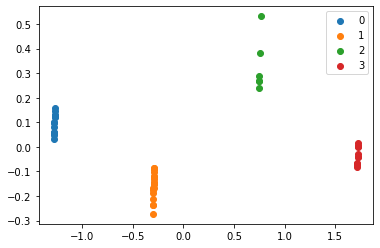

In [88]:
e=np.unique(kmeans1.labels_)
for i in e:
    plt.scatter(pca_crm_norm[kmeans1.labels_==i,0],pca_crm_norm[kmeans1.labels_==i,1],label=i)
plt.legend()
plt.show()

In [89]:
#Average of all the Crimes in Cluster=0 Cities
crm[crm['Cluster_kmeans']==0].mean()

C:\Users\MOHD SHOEB\AppData\Local\Temp\ipykernel_7572\1762525244.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crm[crm['Cluster_kmeans']==0].mean()


Murder              6.542857
Assault           145.285714
UrbanPop           63.500000
Rape               20.107143
Clusters_hc         2.785714
Cluster_kmeans      0.000000
dtype: float64

In [90]:
#Average of all the Crimes in Cluster=1 Cities
crm[crm['Cluster_kmeans']==1].mean()

C:\Users\MOHD SHOEB\AppData\Local\Temp\ipykernel_7572\1098310455.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crm[crm['Cluster_kmeans']==1].mean()


Murder             12.021053
Assault           260.526316
UrbanPop           66.421053
Rape               27.694737
Clusters_hc         2.000000
Cluster_kmeans      1.000000
dtype: float64

In [91]:
#Average of all the Crimes in Cluster=2 Cities
crm[crm['Cluster_kmeans']==2].mean()

C:\Users\MOHD SHOEB\AppData\Local\Temp\ipykernel_7572\4048256765.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crm[crm['Cluster_kmeans']==2].mean()


Murder             2.616667
Assault           54.833333
UrbanPop          62.000000
Rape              12.333333
Clusters_hc        0.000000
Cluster_kmeans     2.000000
dtype: float64

In [92]:
#Average of all the Crimes in Cluster=3 Cities
crm[crm['Cluster_kmeans']==3].mean()

C:\Users\MOHD SHOEB\AppData\Local\Temp\ipykernel_7572\3993451987.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crm[crm['Cluster_kmeans']==3].mean()


Murder              4.881818
Assault           111.363636
UrbanPop           68.545455
Rape               16.354545
Clusters_hc         1.000000
Cluster_kmeans      3.000000
dtype: float64

# Creating Table for Kmeans Clusters

In [140]:
from tabulate import tabulate
table2=[['Kmeans-Clusters','Crime','Murder','Assault','UrbanPop','Rape'],
       ['Cluster-0','Crime is High','6.542','145.28','63.500','20.107']
       ,['Cluster-1','Crime is Very High','12.021','260.526','66.421', '27.694'],
       ['Cluster-2','Crime is Very Low','2.616','54.833','62.000', '12.333'],
       ['Cluster-3','Crime is low','4.881','111.363','68.545','16.354']]

In [141]:
print(tabulate(table2,headers='firstrow',tablefmt='fancy_grid'))

╒═══════════════════╤════════════════════╤══════════╤═══════════╤════════════╤════════╕
│ Kmeans-Clusters   │ Crime              │   Murder │   Assault │   UrbanPop │   Rape │
╞═══════════════════╪════════════════════╪══════════╪═══════════╪════════════╪════════╡
│ Cluster-0         │ Crime is High      │    6.542 │   145.28  │     63.5   │ 20.107 │
├───────────────────┼────────────────────┼──────────┼───────────┼────────────┼────────┤
│ Cluster-1         │ Crime is Very High │   12.021 │   260.526 │     66.421 │ 27.694 │
├───────────────────┼────────────────────┼──────────┼───────────┼────────────┼────────┤
│ Cluster-2         │ Crime is Very Low  │    2.616 │    54.833 │     62     │ 12.333 │
├───────────────────┼────────────────────┼──────────┼───────────┼────────────┼────────┤
│ Cluster-3         │ Crime is low       │    4.881 │   111.363 │     68.545 │ 16.354 │
╘═══════════════════╧════════════════════╧══════════╧═══════════╧════════════╧════════╛


Cities in Cluster-1 have more crime while Cities in Cluster -2 have very less crime infering cities in Cluster-2 are much safer than Cluster-1

In [95]:
crm[crm['Cluster_kmeans']==0].City

5          Colorado
11            Idaho
16         Kentucky
24         Missouri
25          Montana
35         Oklahoma
36           Oregon
38     Rhode Island
40     South Dakota
42            Texas
45         Virginia
46       Washington
47    West Virginia
49          Wyoming
Name: City, dtype: object

In [96]:
table_km_0=[['Cities in Cluster-0'],['Colorado'],['Idaho'],['Kentucky'],['Missouri'],
        ['Montana'],['Oklahoma'],['Oregon'],
        ['Rhode Island'],['South Dakota'],['Texas'],['Virginia'],['Washington'],['West Virginia'],['Wyoming']]

In [97]:
print(tabulate(table_km_0,headers='firstrow',tablefmt='fancy_grid', showindex=range(1,15)))

╒════╤═══════════════════════╕
│    │ Cities in Cluster-0   │
╞════╪═══════════════════════╡
│  1 │ Colorado              │
├────┼───────────────────────┤
│  2 │ Idaho                 │
├────┼───────────────────────┤
│  3 │ Kentucky              │
├────┼───────────────────────┤
│  4 │ Missouri              │
├────┼───────────────────────┤
│  5 │ Montana               │
├────┼───────────────────────┤
│  6 │ Oklahoma              │
├────┼───────────────────────┤
│  7 │ Oregon                │
├────┼───────────────────────┤
│  8 │ Rhode Island          │
├────┼───────────────────────┤
│  9 │ South Dakota          │
├────┼───────────────────────┤
│ 10 │ Texas                 │
├────┼───────────────────────┤
│ 11 │ Virginia              │
├────┼───────────────────────┤
│ 12 │ Washington            │
├────┼───────────────────────┤
│ 13 │ West Virginia         │
├────┼───────────────────────┤
│ 14 │ Wyoming               │
╘════╧═══════════════════════╛


In [98]:
crm[crm['Cluster_kmeans']==1].City

0            Alabama
1             Alaska
2            Arizona
3           Arkansas
4         California
7           Delaware
8            Florida
9            Georgia
12          Illinois
17         Louisiana
19          Maryland
21          Michigan
23       Mississippi
27            Nevada
30        New Mexico
31          New York
32    North Carolina
39    South Carolina
41         Tennessee
Name: City, dtype: object

In [99]:
table_km_1=[['Cities in Cluster1'],[' Alabama'],['Alaska'],
['Arizona'],
['Arkansas'],
['California'],
['Delaware'],
['Florida'],
['Georgia'],
['Illinois'],
['Louisiana'],
['Maryland'],
['Michigan'],
['Mississippi'],
['Nevada'],
['New Mexico'],
['New York'],
['North Carolina'],
['South Carolina'],
['Tennessee']]

In [100]:
print(tabulate(table_km_1,headers='firstrow',tablefmt='fancy_grid',showindex=range(1,20)))

╒════╤══════════════════════╕
│    │ Cities in Cluster1   │
╞════╪══════════════════════╡
│  1 │ Alabama              │
├────┼──────────────────────┤
│  2 │ Alaska               │
├────┼──────────────────────┤
│  3 │ Arizona              │
├────┼──────────────────────┤
│  4 │ Arkansas             │
├────┼──────────────────────┤
│  5 │ California           │
├────┼──────────────────────┤
│  6 │ Delaware             │
├────┼──────────────────────┤
│  7 │ Florida              │
├────┼──────────────────────┤
│  8 │ Georgia              │
├────┼──────────────────────┤
│  9 │ Illinois             │
├────┼──────────────────────┤
│ 10 │ Louisiana            │
├────┼──────────────────────┤
│ 11 │ Maryland             │
├────┼──────────────────────┤
│ 12 │ Michigan             │
├────┼──────────────────────┤
│ 13 │ Mississippi          │
├────┼──────────────────────┤
│ 14 │ Nevada               │
├────┼──────────────────────┤
│ 15 │ New Mexico           │
├────┼──────────────────────┤
│ 16 │ New

In [101]:
crm[crm['Cluster_kmeans']==2].City

10           Hawaii
14             Iowa
22        Minnesota
28    New Hampshire
33     North Dakota
48        Wisconsin
Name: City, dtype: object

In [102]:
table_km_2=[['Cities in Cluster-2'],['Hawaii'],
['Iowa'],
['Minnesota'],
['New Hampshire'],
['North Dakota'],
['Wisconsin']]   

In [103]:

print(tabulate(table_km_2,headers='firstrow',tablefmt='fancy_grid', showindex=range(1,7)))


╒════╤═══════════════════════╕
│    │ Cities in Cluster-2   │
╞════╪═══════════════════════╡
│  1 │ Hawaii                │
├────┼───────────────────────┤
│  2 │ Iowa                  │
├────┼───────────────────────┤
│  3 │ Minnesota             │
├────┼───────────────────────┤
│  4 │ New Hampshire         │
├────┼───────────────────────┤
│  5 │ North Dakota          │
├────┼───────────────────────┤
│  6 │ Wisconsin             │
╘════╧═══════════════════════╛


In [104]:
crm[crm['Cluster_kmeans']==3].City


6       Connecticut
13          Indiana
15           Kansas
18            Maine
20    Massachusetts
26         Nebraska
29       New Jersey
34             Ohio
37     Pennsylvania
43             Utah
44          Vermont
Name: City, dtype: object

In [105]:


table_km_3=[['Cities in Cluster-3'],['Connecticut'],['Indiana'],['Kansas'],['Maine'],
        ['Massachusetts'],['Nebraska'],['New Jersey'],[' Ohio'],['Pennsylvania'],['Utah'],['Vermont']]


In [106]:

print(tabulate(table_km_3,headers='firstrow',tablefmt='fancy_grid', showindex=range(1,12)))


╒════╤═══════════════════════╕
│    │ Cities in Cluster-3   │
╞════╪═══════════════════════╡
│  1 │ Connecticut           │
├────┼───────────────────────┤
│  2 │ Indiana               │
├────┼───────────────────────┤
│  3 │ Kansas                │
├────┼───────────────────────┤
│  4 │ Maine                 │
├────┼───────────────────────┤
│  5 │ Massachusetts         │
├────┼───────────────────────┤
│  6 │ Nebraska              │
├────┼───────────────────────┤
│  7 │ New Jersey            │
├────┼───────────────────────┤
│  8 │ Ohio                  │
├────┼───────────────────────┤
│  9 │ Pennsylvania          │
├────┼───────────────────────┤
│ 10 │ Utah                  │
├────┼───────────────────────┤
│ 11 │ Vermont               │
╘════╧═══════════════════════╛


# DBscan

In [107]:
from sklearn.cluster import DBSCAN

In [108]:
dbscan=DBSCAN(eps=0.5,min_samples=6)
dbscan.fit(crm_norm)

DBSCAN(min_samples=6)

In [109]:
crm.head()

,City,Murder,Assault,UrbanPop,Rape,Clusters_hc,Cluster_kmeans
0,Alabama,13.2,236,58,21.2,2,1
1,Alaska,10.0,263,48,44.5,2,1
2,Arizona,8.1,294,80,31.0,2,1
3,Arkansas,8.8,190,50,19.5,2,1
4,California,9.0,276,91,40.6,2,1


In [110]:
crm['Cluster_dbscan']=dbscan.labels_

In [111]:
crm.head()

,City,Murder,Assault,UrbanPop,Rape,Clusters_hc,Cluster_kmeans,Cluster_dbscan
0,Alabama,13.2,236,58,21.2,2,1,0
1,Alaska,10.0,263,48,44.5,2,1,0
2,Arizona,8.1,294,80,31.0,2,1,0
3,Arkansas,8.8,190,50,19.5,2,1,0
4,California,9.0,276,91,40.6,2,1,0


In [112]:
dbscan.labels_

array([0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 3, 1, 0, 2, 3, 2, 1, 0, 2, 0, 2, 0,
       3, 0, 1, 1, 2, 0, 3, 2, 0, 0, 0, 3, 2, 1, 1, 2, 1, 0, 1, 0, 1, 2,
       2, 1, 1, 1, 3, 1], dtype=int64)

In [113]:
#Average of all the Crimes in Cluster=0 Cities
crm[crm['Cluster_dbscan']==0].mean()

C:\Users\MOHD SHOEB\AppData\Local\Temp\ipykernel_7572\3937674330.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crm[crm['Cluster_dbscan']==0].mean()


Murder             12.021053
Assault           260.526316
UrbanPop           66.421053
Rape               27.694737
Clusters_hc         2.000000
Cluster_kmeans      1.000000
Cluster_dbscan      0.000000
dtype: float64

In [114]:
#Average of all the Crimes in Cluster=0 Cities
crm[crm['Cluster_dbscan']==1].mean()

C:\Users\MOHD SHOEB\AppData\Local\Temp\ipykernel_7572\693399779.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crm[crm['Cluster_dbscan']==1].mean()


Murder              6.542857
Assault           145.285714
UrbanPop           63.500000
Rape               20.107143
Clusters_hc         2.785714
Cluster_kmeans      0.000000
Cluster_dbscan      1.000000
dtype: float64

In [115]:
#Average of all the Crimes in Cluster=0 Cities
crm[crm['Cluster_dbscan']==2].mean()

C:\Users\MOHD SHOEB\AppData\Local\Temp\ipykernel_7572\1005531247.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crm[crm['Cluster_dbscan']==2].mean()


Murder              4.881818
Assault           111.363636
UrbanPop           68.545455
Rape               16.354545
Clusters_hc         1.000000
Cluster_kmeans      3.000000
Cluster_dbscan      2.000000
dtype: float64

In [116]:
#Average of all the Crimes in Cluster=0 Cities
crm[crm['Cluster_dbscan']==3].mean()

C:\Users\MOHD SHOEB\AppData\Local\Temp\ipykernel_7572\258962780.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crm[crm['Cluster_dbscan']==3].mean()


Murder             2.616667
Assault           54.833333
UrbanPop          62.000000
Rape              12.333333
Clusters_hc        0.000000
Cluster_kmeans     2.000000
Cluster_dbscan     3.000000
dtype: float64

In [117]:
#Silhoutte score to check the clusters are  correctly divided
db_score = silhouette_score(crm_norm,dbscan.labels_,metric='euclidean')
db_score

0.9180363213761794

# Creating Table for DBSCAN Clusters

In [142]:
table3=[['DBScan-Clusters','Crime','Murder','Assault','UrbanPop','Rape'],
       ['Cluster-0','Crime is Very High','12.021','260.526','66.421', '27.694']
       ,['Cluster-1','Crime is High','6.542','145.28','63.500','20.107'],
       ['Cluster-2','Crime is low','4.881','111.363','68.545','16.354'],
       ['Cluster-3','Crime is Very Low','2.616','54.833','62.000', '12.333']]

In [143]:
print(tabulate(table3,headers='firstrow',tablefmt='fancy_grid'))

╒═══════════════════╤════════════════════╤══════════╤═══════════╤════════════╤════════╕
│ DBScan-Clusters   │ Crime              │   Murder │   Assault │   UrbanPop │   Rape │
╞═══════════════════╪════════════════════╪══════════╪═══════════╪════════════╪════════╡
│ Cluster-0         │ Crime is Very High │   12.021 │   260.526 │     66.421 │ 27.694 │
├───────────────────┼────────────────────┼──────────┼───────────┼────────────┼────────┤
│ Cluster-1         │ Crime is High      │    6.542 │   145.28  │     63.5   │ 20.107 │
├───────────────────┼────────────────────┼──────────┼───────────┼────────────┼────────┤
│ Cluster-2         │ Crime is low       │    4.881 │   111.363 │     68.545 │ 16.354 │
├───────────────────┼────────────────────┼──────────┼───────────┼────────────┼────────┤
│ Cluster-3         │ Crime is Very Low  │    2.616 │    54.833 │     62     │ 12.333 │
╘═══════════════════╧════════════════════╧══════════╧═══════════╧════════════╧════════╛


# DBSCAN Clustering Vizualization of Clusters

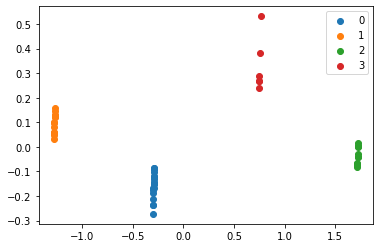

In [144]:
f=np.unique(dbscan.labels_)
for i in f:
    plt.scatter(pca_crm_norm[dbscan.labels_==i,0],pca_crm_norm[dbscan.labels_==i,1],label=i)
plt.legend()
plt.show()

In [145]:
crm[crm['Cluster_dbscan']==0].City

0            Alabama
1             Alaska
2            Arizona
3           Arkansas
4         California
7           Delaware
8            Florida
9            Georgia
12          Illinois
17         Louisiana
19          Maryland
21          Michigan
23       Mississippi
27            Nevada
30        New Mexico
31          New York
32    North Carolina
39    South Carolina
41         Tennessee
Name: City, dtype: object

In [146]:
table_db_0=[['Cities in Cluster-0'],[' Alabama'],['Alaska'],
['Arizona'],
['Arkansas'],
['California'],
['Delaware'],
['Florida'],
['Georgia'],
['Illinois'],
['Louisiana'],
['Maryland'],
['Michigan'],
['Mississippi'],
['Nevada'],
['New Mexico'],
['New York'],
['North Carolina'],
['South Carolina'],
['Tennessee']]

In [147]:
print(tabulate(table_db_0,headers='firstrow',tablefmt='fancy_grid', showindex=range(1,20)))

╒════╤═══════════════════════╕
│    │ Cities in Cluster-0   │
╞════╪═══════════════════════╡
│  1 │ Alabama               │
├────┼───────────────────────┤
│  2 │ Alaska                │
├────┼───────────────────────┤
│  3 │ Arizona               │
├────┼───────────────────────┤
│  4 │ Arkansas              │
├────┼───────────────────────┤
│  5 │ California            │
├────┼───────────────────────┤
│  6 │ Delaware              │
├────┼───────────────────────┤
│  7 │ Florida               │
├────┼───────────────────────┤
│  8 │ Georgia               │
├────┼───────────────────────┤
│  9 │ Illinois              │
├────┼───────────────────────┤
│ 10 │ Louisiana             │
├────┼───────────────────────┤
│ 11 │ Maryland              │
├────┼───────────────────────┤
│ 12 │ Michigan              │
├────┼───────────────────────┤
│ 13 │ Mississippi           │
├────┼───────────────────────┤
│ 14 │ Nevada                │
├────┼───────────────────────┤
│ 15 │ New Mexico            │
├────┼──

In [148]:
crm[crm['Cluster_dbscan']==1].City

5          Colorado
11            Idaho
16         Kentucky
24         Missouri
25          Montana
35         Oklahoma
36           Oregon
38     Rhode Island
40     South Dakota
42            Texas
45         Virginia
46       Washington
47    West Virginia
49          Wyoming
Name: City, dtype: object

In [149]:
table_db_1=[['Cities in Cluster-1'],['Colorado'],['Idaho'],['Kentucky'],['Missouri'],
        ['Montana'],['Oklahoma'],['Oregon'],
        ['Rhode Island'],['South Dakota'],['Texas'],['Virginia'],['Washington'],['West Virginia'],['Wyoming']]


In [150]:
print(tabulate(table_db_1,headers='firstrow',tablefmt='fancy_grid', showindex=range(1,15)))

╒════╤═══════════════════════╕
│    │ Cities in Cluster-1   │
╞════╪═══════════════════════╡
│  1 │ Colorado              │
├────┼───────────────────────┤
│  2 │ Idaho                 │
├────┼───────────────────────┤
│  3 │ Kentucky              │
├────┼───────────────────────┤
│  4 │ Missouri              │
├────┼───────────────────────┤
│  5 │ Montana               │
├────┼───────────────────────┤
│  6 │ Oklahoma              │
├────┼───────────────────────┤
│  7 │ Oregon                │
├────┼───────────────────────┤
│  8 │ Rhode Island          │
├────┼───────────────────────┤
│  9 │ South Dakota          │
├────┼───────────────────────┤
│ 10 │ Texas                 │
├────┼───────────────────────┤
│ 11 │ Virginia              │
├────┼───────────────────────┤
│ 12 │ Washington            │
├────┼───────────────────────┤
│ 13 │ West Virginia         │
├────┼───────────────────────┤
│ 14 │ Wyoming               │
╘════╧═══════════════════════╛


In [151]:
crm[crm['Cluster_dbscan']==2].City

6       Connecticut
13          Indiana
15           Kansas
18            Maine
20    Massachusetts
26         Nebraska
29       New Jersey
34             Ohio
37     Pennsylvania
43             Utah
44          Vermont
Name: City, dtype: object

In [152]:
table_db_2=[['Cities in Cluster-2'],['Connecticut'],['Indiana'],['Kansas'],['Maine'],
        ['Massachusetts'],['Nebraska'],['New Jersey'],[' Ohio'],['Pennsylvania'],['Rhode Island'],['Utah'],['Vermont']]

In [153]:
print(tabulate(table_db_2,headers='firstrow',tablefmt='fancy_grid', showindex=range(1,13)))

╒════╤═══════════════════════╕
│    │ Cities in Cluster-2   │
╞════╪═══════════════════════╡
│  1 │ Connecticut           │
├────┼───────────────────────┤
│  2 │ Indiana               │
├────┼───────────────────────┤
│  3 │ Kansas                │
├────┼───────────────────────┤
│  4 │ Maine                 │
├────┼───────────────────────┤
│  5 │ Massachusetts         │
├────┼───────────────────────┤
│  6 │ Nebraska              │
├────┼───────────────────────┤
│  7 │ New Jersey            │
├────┼───────────────────────┤
│  8 │ Ohio                  │
├────┼───────────────────────┤
│  9 │ Pennsylvania          │
├────┼───────────────────────┤
│ 10 │ Rhode Island          │
├────┼───────────────────────┤
│ 11 │ Utah                  │
├────┼───────────────────────┤
│ 12 │ Vermont               │
╘════╧═══════════════════════╛


In [154]:
crm[crm['Cluster_dbscan']==3].City

10           Hawaii
14             Iowa
22        Minnesota
28    New Hampshire
33     North Dakota
48        Wisconsin
Name: City, dtype: object

In [155]:
table_db_3=[['Cities in Cluster-3'],['Hawaii'],
['Iowa'],
['Minnesota'],
['New Hampshire'],
['North Dakota'],
['Wisconsin']]   


In [156]:
print(tabulate(table_db_3,headers='firstrow',tablefmt='fancy_grid', showindex=range(1,7)))

╒════╤═══════════════════════╕
│    │ Cities in Cluster-3   │
╞════╪═══════════════════════╡
│  1 │ Hawaii                │
├────┼───────────────────────┤
│  2 │ Iowa                  │
├────┼───────────────────────┤
│  3 │ Minnesota             │
├────┼───────────────────────┤
│  4 │ New Hampshire         │
├────┼───────────────────────┤
│  5 │ North Dakota          │
├────┼───────────────────────┤
│  6 │ Wisconsin             │
╘════╧═══════════════════════╛


In [157]:
#Comparing DBSCAN Cluster=0 with clusters found from kmeans and hierarchical Clusters
crm[crm['Cluster_dbscan']==0].mean(),crm[crm['Cluster_kmeans']==1].mean(),crm[crm['Clusters_hc']==2].mean()
#here Cluster-0 of Dbscan is equal to Cluster-1 of Kmeans which is nearly equal to Cluster-2 of Hierarchical 

C:\Users\MOHD SHOEB\AppData\Local\Temp\ipykernel_7572\727081326.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crm[crm['Cluster_dbscan']==0].mean(),crm[crm['Cluster_kmeans']==1].mean(),crm[crm['Clusters_hc']==2].mean()


(Murder             12.021053
 Assault           260.526316
 UrbanPop           66.421053
 Rape               27.694737
 Clusters_hc         2.000000
 Cluster_kmeans      1.000000
 Cluster_dbscan      0.000000
 dtype: float64,
 Murder             12.021053
 Assault           260.526316
 UrbanPop           66.421053
 Rape               27.694737
 Clusters_hc         2.000000
 Cluster_kmeans      1.000000
 Cluster_dbscan      0.000000
 dtype: float64,
 Murder             11.76
 Assault           255.55
 UrbanPop           66.10
 Rape               27.09
 Clusters_hc         2.00
 Cluster_kmeans      0.95
 Cluster_dbscan      0.05
 dtype: float64)

In [158]:
#Comparing DBSCAN Cluster=1 with clusters found from kmeans and hierarchical Clusters
crm[crm['Cluster_dbscan']==1].mean(),crm[crm['Cluster_kmeans']==0].mean(),crm[crm['Clusters_hc']==3].mean()
#here Cluster-1 of Dbscan is equal to Cluster-0 of Kmeans which is nearly equal to Cluster-3 of Hierarchical 

C:\Users\MOHD SHOEB\AppData\Local\Temp\ipykernel_7572\382892165.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crm[crm['Cluster_dbscan']==1].mean(),crm[crm['Cluster_kmeans']==0].mean(),crm[crm['Clusters_hc']==3].mean()


(Murder              6.542857
 Assault           145.285714
 UrbanPop           63.500000
 Rape               20.107143
 Clusters_hc         2.785714
 Cluster_kmeans      0.000000
 Cluster_dbscan      1.000000
 dtype: float64,
 Murder              6.542857
 Assault           145.285714
 UrbanPop           63.500000
 Rape               20.107143
 Clusters_hc         2.785714
 Cluster_kmeans      0.000000
 Cluster_dbscan      1.000000
 dtype: float64,
 Murder              6.783333
 Assault           141.583333
 UrbanPop           61.833333
 Rape               21.466667
 Clusters_hc         3.000000
 Cluster_kmeans      0.000000
 Cluster_dbscan      1.000000
 dtype: float64)

In [159]:
#Comparing DBSCAN Cluster=2 with clusters found from kmeans and hierarchical Clusters
crm[crm['Cluster_dbscan']==2].mean(),crm[crm['Cluster_kmeans']==3].mean(),crm[crm['Clusters_hc']==1].mean()
#here Cluster-2 of Dbscan is equal to Cluster-3 of Kmeans which is nearly equal to Cluster-1 of Hierarchical 

C:\Users\MOHD SHOEB\AppData\Local\Temp\ipykernel_7572\94322483.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crm[crm['Cluster_dbscan']==2].mean(),crm[crm['Cluster_kmeans']==3].mean(),crm[crm['Clusters_hc']==1].mean()


(Murder              4.881818
 Assault           111.363636
 UrbanPop           68.545455
 Rape               16.354545
 Clusters_hc         1.000000
 Cluster_kmeans      3.000000
 Cluster_dbscan      2.000000
 dtype: float64,
 Murder              4.881818
 Assault           111.363636
 UrbanPop           68.545455
 Rape               16.354545
 Clusters_hc         1.000000
 Cluster_kmeans      3.000000
 Cluster_dbscan      2.000000
 dtype: float64,
 Murder              4.758333
 Assault           116.583333
 UrbanPop           70.083333
 Rape               15.683333
 Clusters_hc         1.000000
 Cluster_kmeans      2.750000
 Cluster_dbscan      1.916667
 dtype: float64)

In [160]:
#Comparing DBSCAN Cluster=3 with clusters found from kmeans and hierarchical Clusters
crm[crm['Cluster_dbscan']==3].mean(),crm[crm['Cluster_kmeans']==2].mean(),crm[crm['Clusters_hc']==0].mean()
#here Cluster-3 of Dbscan is equal to Cluster-2 of Kmeans which is nearly equal to Cluster-0 of Hierarchical 

C:\Users\MOHD SHOEB\AppData\Local\Temp\ipykernel_7572\3762193050.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crm[crm['Cluster_dbscan']==3].mean(),crm[crm['Cluster_kmeans']==2].mean(),crm[crm['Clusters_hc']==0].mean()


(Murder             2.616667
 Assault           54.833333
 UrbanPop          62.000000
 Rape              12.333333
 Clusters_hc        0.000000
 Cluster_kmeans     2.000000
 Cluster_dbscan     3.000000
 dtype: float64,
 Murder             2.616667
 Assault           54.833333
 UrbanPop          62.000000
 Rape              12.333333
 Clusters_hc        0.000000
 Cluster_kmeans     2.000000
 Cluster_dbscan     3.000000
 dtype: float64,
 Murder             2.616667
 Assault           54.833333
 UrbanPop          62.000000
 Rape              12.333333
 Clusters_hc        0.000000
 Cluster_kmeans     2.000000
 Cluster_dbscan     3.000000
 dtype: float64)

In [161]:
#Comparing all Clusters from 3 Clustering Algorithm 
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid')),
print(tabulate(table2,headers='firstrow',tablefmt='fancy_grid')),
print(tabulate(table3,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════════════════╤════════════════════╤══════════╤═══════════╤════════════╤════════╕
│ Hierarchical-Clusters   │ Crime              │   Murder │   Assault │   UrbanPop │   Rape │
╞═════════════════════════╪════════════════════╪══════════╪═══════════╪════════════╪════════╡
│ Cluster-0               │ Crime is Very Low  │     2.61 │     54.83 │      62    │  12.3  │
├─────────────────────────┼────────────────────┼──────────┼───────────┼────────────┼────────┤
│ Cluster-1               │ Crime is low       │     4.75 │    116.58 │      70.08 │  15.68 │
├─────────────────────────┼────────────────────┼──────────┼───────────┼────────────┼────────┤
│ Cluster-2               │ Crime is Very High │    11.76 │    255.55 │      66.1  │  27.09 │
├─────────────────────────┼────────────────────┼──────────┼───────────┼────────────┼────────┤
│ Cluster-3               │ Crime is High      │     6.78 │    141.58 │      61.83 │  21.46 │
╘═════════════════════════╧════════════════════╧══════════╧═

In [162]:
from tabulate import tabulate
table_last=[['Clustering Algorithm','No. of Clusters','Silhouette Score'],
['DBSCAN','4',db_score],
['KMeans','4',km_score],
['Hierarchical Clustering','4',hc_score]]

In [163]:
print(tabulate(table_last,headers='firstrow',tablefmt='fancy_grid',showindex=range(1,4)))

╒════╤═════════════════════════╤═══════════════════╤════════════════════╕
│    │ Clustering Algorithm    │   No. of Clusters │   Silhouette Score │
╞════╪═════════════════════════╪═══════════════════╪════════════════════╡
│  1 │ DBSCAN                  │                 4 │           0.918036 │
├────┼─────────────────────────┼───────────────────┼────────────────────┤
│  2 │ KMeans                  │                 4 │           0.918036 │
├────┼─────────────────────────┼───────────────────┼────────────────────┤
│  3 │ Hierarchical Clustering │                 4 │           0.449239 │
╘════╧═════════════════════════╧═══════════════════╧════════════════════╛


# When compared to Kmeans and DBscan, which operate very well on non-linear data, I observed that the clustering done by Hierarchical clustering is quite close to the results of KMeans and DBSCAN clustering for this dataset. The outputs of both Kmeans and DBscan, the Clusters were the same to the degree that the mean of each feature Column was identical at the sixth decimal, and the Cities found in KMeans and DBSCAN clusters were the same when compared.
 